In [1]:
#%%
#md

# Teneto and BIDS

__(This notebook is a work in progress).__ 

This notebook goes through teneto's compatability with the BIDS format.

While teneto is compatible with different types of data, it was originally made regarding to neuroimaging data.
Within the neuroimaging community there has been a push to use the same type of data structures (called [BIDS](http://bids.neuroimaging.io/)).

If you have data organized with BIDS, teneto can utilize this structure so that it is easy to apply Teneto's functions to multiple subjects, sessions, tasks etc.

Teneto works on _preprocessed_ data. This is found in the derivatives folder. Tools for such preprecessing include fmriprep, C-PAC, SPM etc. These can be found [here](https://github.com/BIDS-Apps) 

## Prerequisites to run the notebook

First we need some data. [We will use dataset (ds001053) from openneuro.org](https://openneuro.org/datasets/ds001053/versions/00001). Download the data that has been preprocessed with fmriprep.

Note: while teneto works with only the preprocessed data, most BIDS datasets will include the raw data as well. In such instances, there is even more functionality.

In [2]:
#%%
# Import everything needed
import teneto

#%%
#md

/home/william/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Failed to import duecredit due to No module named 'duecredit'


So teneto and BIDS uses an object called TenetoBIDS. You need to specify where the BIDS dataset is.
Teneto also needs to know where the preprocessed data is. In the BIDS structure, this is in the derivatives folder. Here we will use fmriprep.
Note, this can be passed as an argument when defining the object with pipeline='fmriprep' because the preprocessed data is found in ./[datasetname]/derivatives/fmriprep

To select the correct files, we also need to flag the analysis_steps and specify it as prepro (this is because we want files that end with '_prepro')

In [3]:
#%%

tnet = teneto.TenetoBIDS('/home/william/datasets/ds001053/',pipeline='fmriprep',raw_data_exists=False, analysis_steps='preproc')


#%%
#md

The point of the TenetoBIDS object is to run time varying connectivity and/or temporal network theory analysis on multiple files. To see which files are currently selected, run:

In [4]:
#%%
tnet.print_dataset_summary()

#%%
#md

--- DATASET INFORMATION ---
--- Subjects ---
Number of subjects (selected): 26
Subjects (selected): 03, 06, 16, 11, 26, 22, 25, 19, 23, 10, 05, 08, 14, 15, 18, 01, 20, 13, 21, 04, 02, 12, 17, 24, 07, 09
--- Tasks ---
No task names found
--- Runs ---
No run names found
--- Sessions ---
No session names found
--- PREPROCESSED DATA (Pipelines/Derivatives) ---
Pipeline: fmriprep
Space not set. To set, run TN.set_space()
No parcellation specified. To set, run TN.set_parcellation()
--- SELECTED DATA ---
Numnber of selected files: 52
/home/william/datasets/ds001053/derivatives/fmriprep/sub-03/func/sub-03_task-visualimageryfalsememory_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz
 - /home/william/datasets/ds001053/derivatives/fmriprep/sub-03/func/sub-03_task-visualimageryfalsememory_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz
 - /home/william/datasets/ds001053/derivatives/fmriprep/sub-06/func/sub-06_task-visualimageryfalsememory_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii

Subjects, tasks, runs, analysis_steps, pipeline and pipeline_subdir (subdirectories within the pipeline folder) can be set when defining the subject or afterwards:

In [5]:
#%%
tnet.set_pipeline('fmriprep')
# Select only subject 2 files are now the selected files.

#%%
tnet.print_dataset_summary()
tnet.pipeline
#%%
#md

--- DATASET INFORMATION ---
--- Subjects ---
Number of subjects (selected): 26
Subjects (selected): 03, 06, 16, 11, 26, 22, 25, 19, 23, 10, 05, 08, 14, 15, 18, 01, 20, 13, 21, 04, 02, 12, 17, 24, 07, 09
--- Tasks ---
No task names found
--- Runs ---
No run names found
--- Sessions ---
No session names found
--- PREPROCESSED DATA (Pipelines/Derivatives) ---
Pipeline: fmriprep
Space not set. To set, run TN.set_space()
No parcellation specified. To set, run TN.set_parcellation()
--- SELECTED DATA ---
Numnber of selected files: 52
/home/william/datasets/ds001053/derivatives/fmriprep/sub-03/func/sub-03_task-visualimageryfalsememory_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz
 - /home/william/datasets/ds001053/derivatives/fmriprep/sub-03/func/sub-03_task-visualimageryfalsememory_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz
 - /home/william/datasets/ds001053/derivatives/fmriprep/sub-06/func/sub-06_task-visualimageryfalsememory_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii

'fmriprep'

Derive the dynamic connectivity estimates. Here we call tnet.derive. We need to give it a dictionary of parameters (see teneto.derive.derive)

In [6]:
#%%
tnet.set_subjects('02')
tnet.print_dataset_summary()

#%%
#md

--- DATASET INFORMATION ---
--- Subjects ---
Number of subjects (selected): 1
Subjects (selected): 02
--- Tasks ---
No task names found
--- Runs ---
No run names found
--- Sessions ---
No session names found
--- PREPROCESSED DATA (Pipelines/Derivatives) ---
Pipeline: fmriprep
Space not set. To set, run TN.set_space()
No parcellation specified. To set, run TN.set_parcellation()
--- SELECTED DATA ---
Numnber of selected files: 2
/home/william/datasets/ds001053/derivatives/fmriprep/sub-02/func/sub-02_task-visualimageryfalsememory_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz
 - /home/william/datasets/ds001053/derivatives/fmriprep/sub-02/func/sub-02_task-visualimageryfalsememory_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz


Here we see two different tasks, for the same subject.

Preprocessing pipelines can have a confound file, and some of these may want to be regressed out. Teneto automatically tries to find the confounds file. But if it exists in a different directory for some reason, you can specify it with tnet.set_confound_pipeline(). Otherwise, it assumes the confound file is in the same directory set by tnet.pipeline.

You can view the confound alternatives (that exist within the counds file) with:

In [7]:
tnet.get_confound_alternatives()

#%%
#md

Confounds in confound files: 
 - Cosine00
 - Cosine01
 - Cosine02
 - Cosine03
 - Cosine04
 - Cosine05
 - Cosine06
 - FramewiseDisplacement
 - GlobalSignal
 - RotX
 - RotY
 - RotZ
 - WhiteMatter
 - X
 - Y
 - Z
 - aCompCor00
 - aCompCor01
 - aCompCor02
 - aCompCor03
 - aCompCor04
 - aCompCor05
 - non-stdDVARS
 - stdDVARS
 - tCompCor00
 - tCompCor01
 - tCompCor02
 - tCompCor03
 - tCompCor04
 - tCompCor05
 - vx-wisestdDVARS


['Cosine00',
 'Cosine01',
 'Cosine02',
 'Cosine03',
 'Cosine04',
 'Cosine05',
 'Cosine06',
 'FramewiseDisplacement',
 'GlobalSignal',
 'RotX',
 'RotY',
 'RotZ',
 'WhiteMatter',
 'X',
 'Y',
 'Z',
 'aCompCor00',
 'aCompCor01',
 'aCompCor02',
 'aCompCor03',
 'aCompCor04',
 'aCompCor05',
 'non-stdDVARS',
 'stdDVARS',
 'tCompCor00',
 'tCompCor01',
 'tCompCor02',
 'tCompCor03',
 'tCompCor04',
 'tCompCor05',
 'vx-wisestdDVARS']

So we are going to regress out some confounds soon. So we need to specify which of the confound alternatives we want to regress out. Here we regress out the confounds "GlobalSignal" and "FramewiseDisplacement

In [8]:
tnet.set_confounds(['FramewiseDisplacement','GlobalSignal'])

#%%
#md

Now we are ready the analysis.

Now we have set up everything, we need to do three things:

1. Make a parcellation (extract regoins of interest) form the neuroimaging files.
2. Derive the time-varying/dynamic functional connectivity.
3. Calculate the temporal network theory metrics.

First: let us make a parcellation (Using power et als 2012 Neuron paper where there are 264 ROIs)

Here the confounds are removed, but this has to be flagged.

In [9]:
#%%
tnet.make_parcellation('power2012_mni',removeconfounds=True)

#%%
#md

Using default parcellation type
Using default parameters
Using default parcellation type
Using default parameters


The files from the parcellation get saved in derivatives/teneto/parcellation

These files are now the selected files, so the pipeline gets updated. By typing tnet.print_dataset_summary() we see that the parcellation
 files are now the selected files.

In [10]:
#%%
tnet.print_dataset_summary()
tnet.pipeline
#%%
#md

--- DATASET INFORMATION ---
--- Subjects ---
Number of subjects (selected): 1
Subjects (selected): 02
--- Tasks ---
No task names found
--- Runs ---
No run names found
--- Sessions ---
No session names found
--- PREPROCESSED DATA (Pipelines/Derivatives) ---
Pipeline: teneto
Pipeline subdirectories: parcellation
Space not set. To set, run TN.set_space()
Parcellation: power2012_mni
--- SELECTED DATA ---
Numnber of selected files: 2
/home/william/datasets/ds001053/derivatives/teneto/sub-02/func/parcellation/sub-02_task-visualimageryfalsememory_run-02_bold_space-MNI152NLin2009cAsym_preproc_parc-power2012_roi.npy
 - /home/william/datasets/ds001053/derivatives/teneto/sub-02/func/parcellation/sub-02_task-visualimageryfalsememory_run-01_bold_space-MNI152NLin2009cAsym_preproc_parc-power2012_roi.npy


'teneto'

Derive the dynamic connectivity estimates. Here we call tnet.derive. We need to give it a dictionary of parameters (see teneto.derive.derive)

/home/william/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


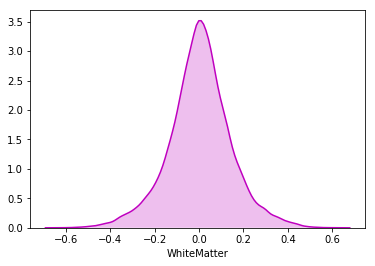

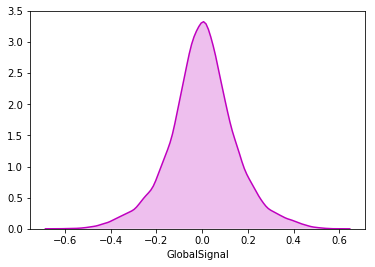

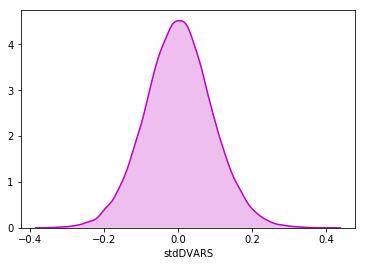

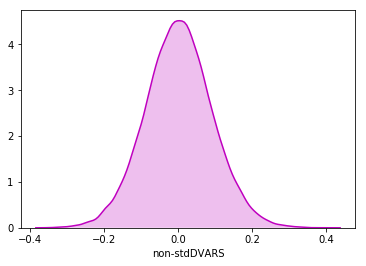

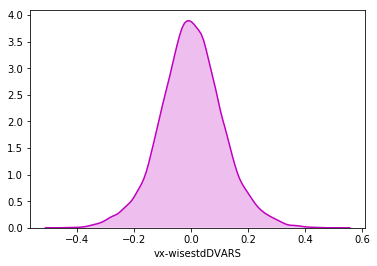

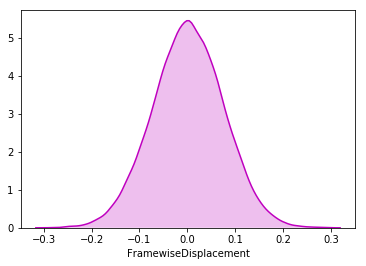

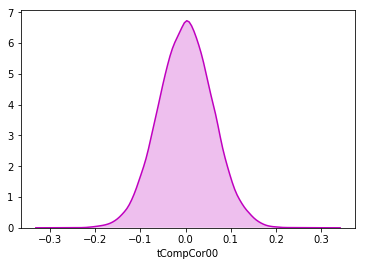

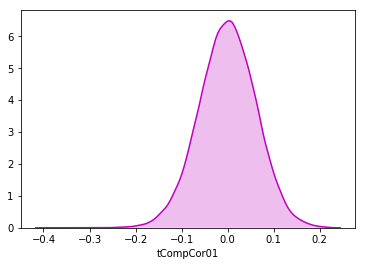

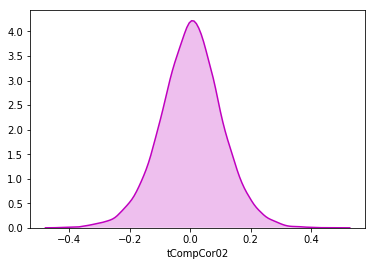

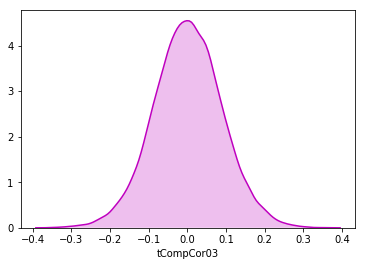

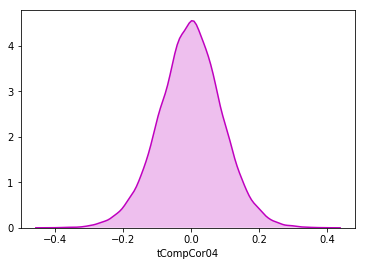

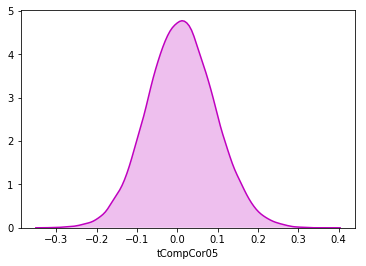

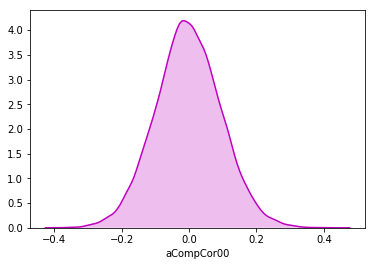

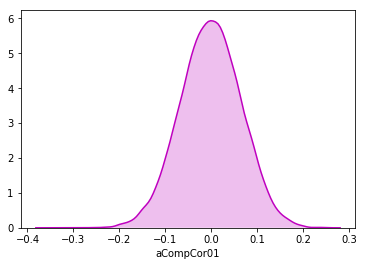

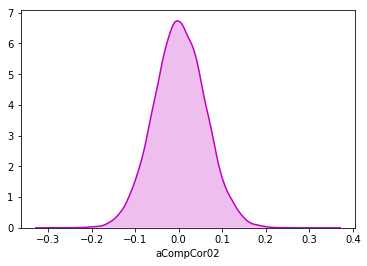

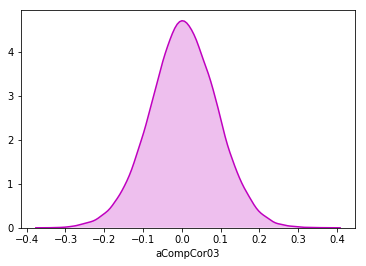

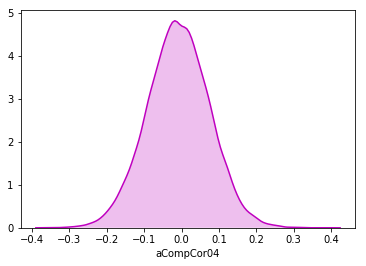

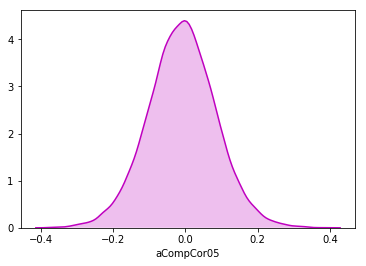

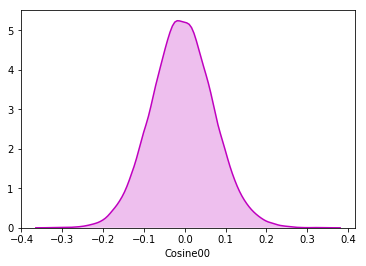

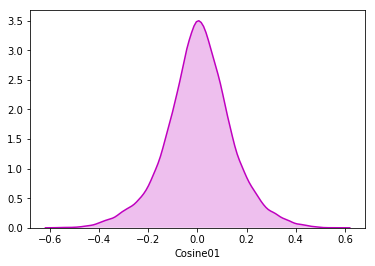

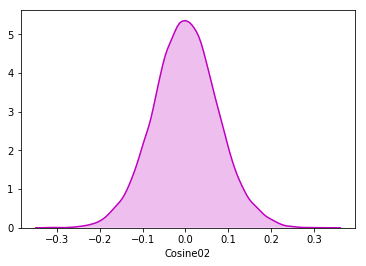

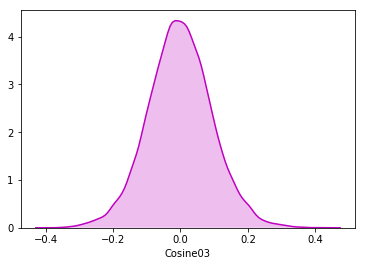

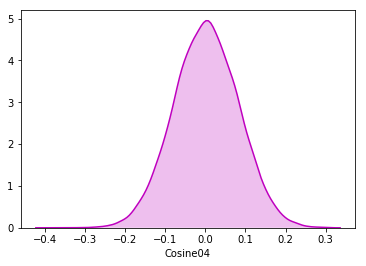

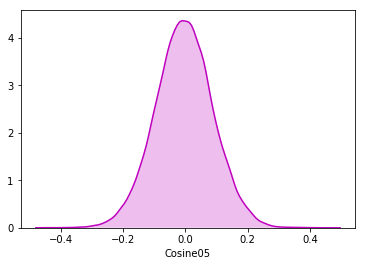

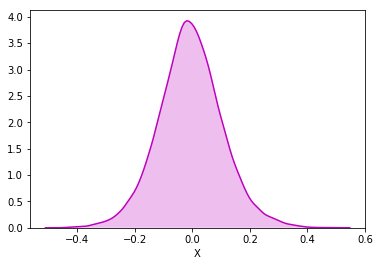

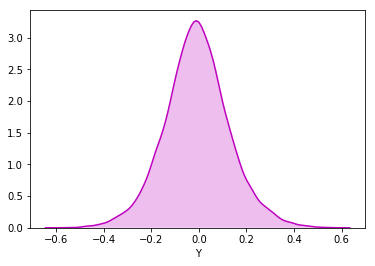

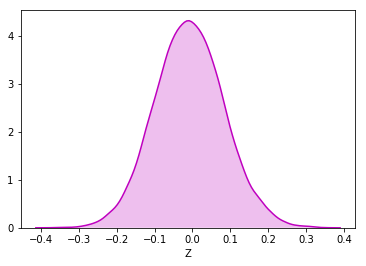

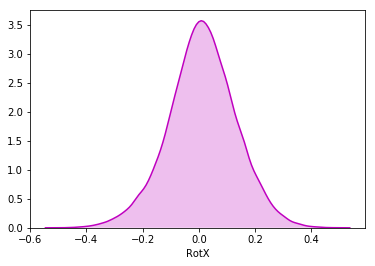

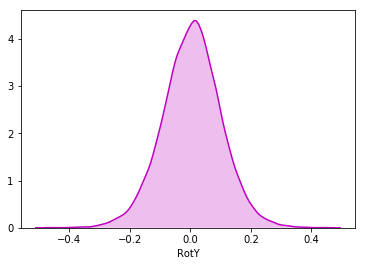

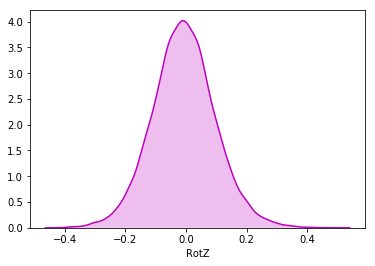

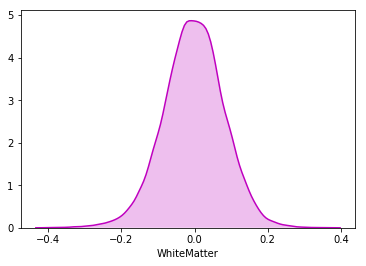

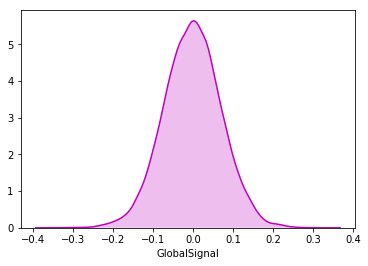

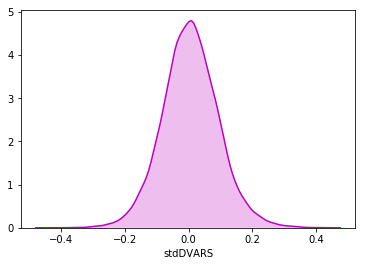

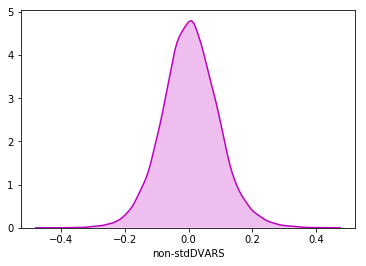

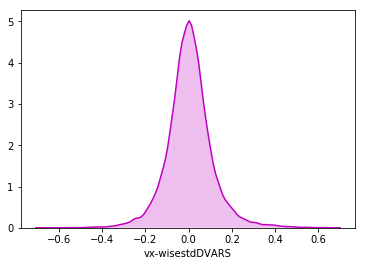

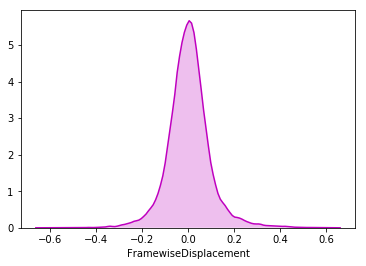

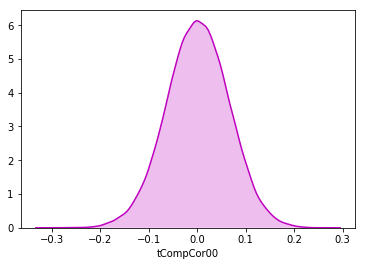

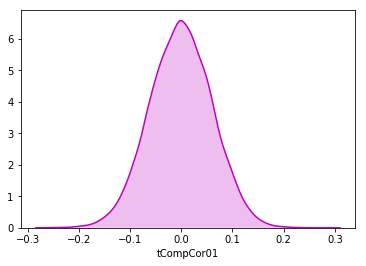

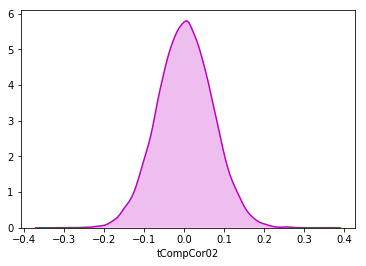

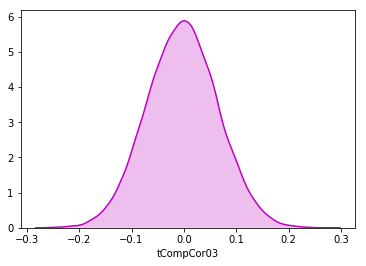

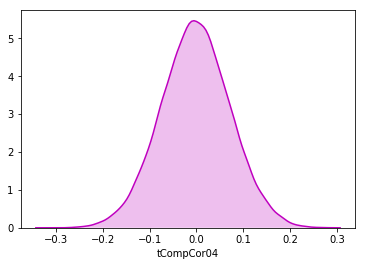

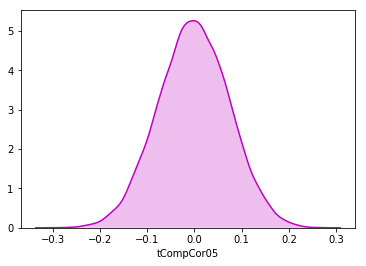

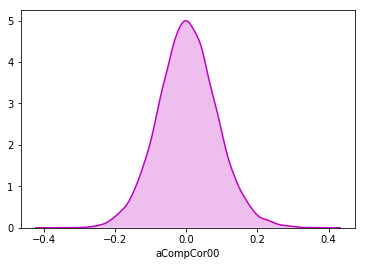

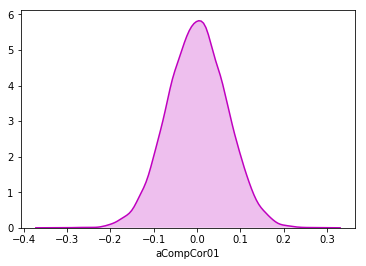

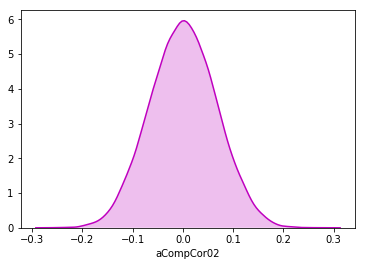

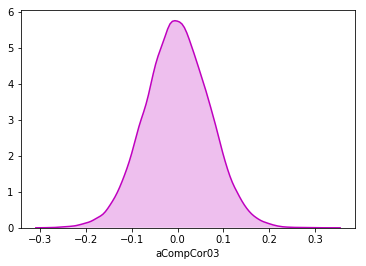

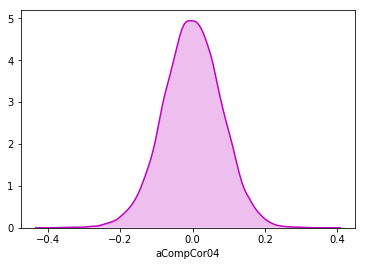

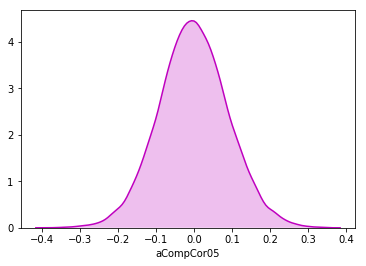

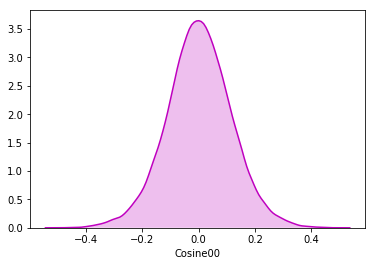

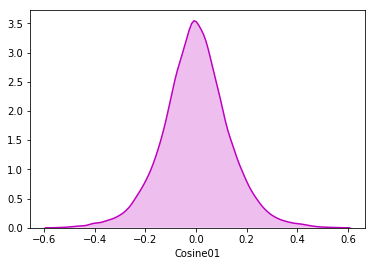

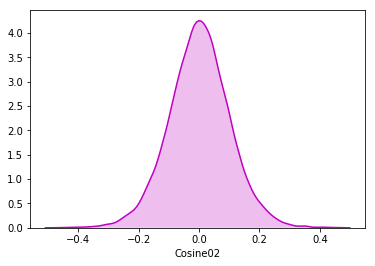

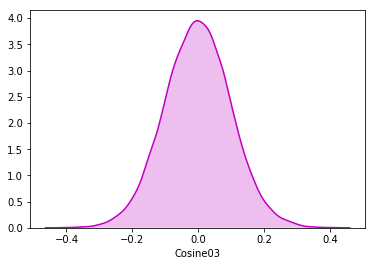

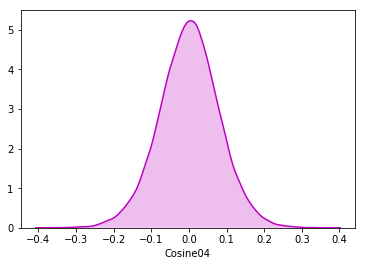

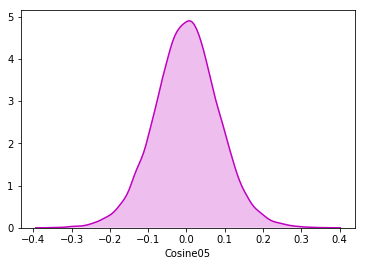

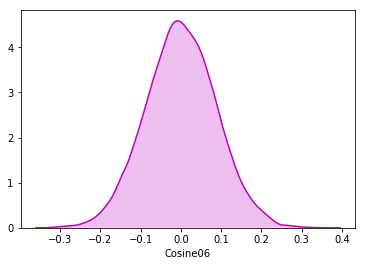

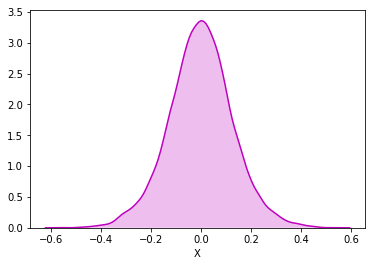

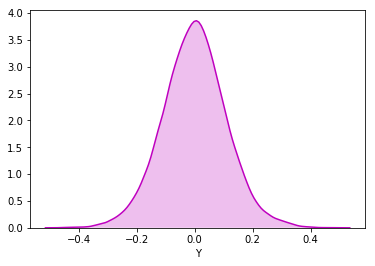

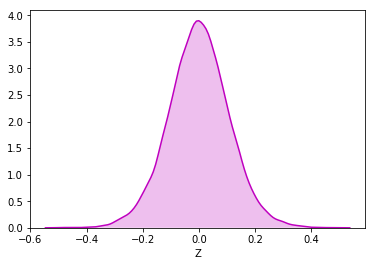

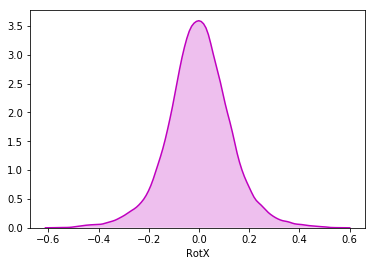

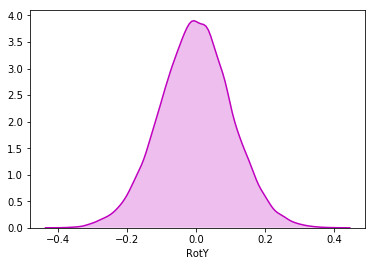

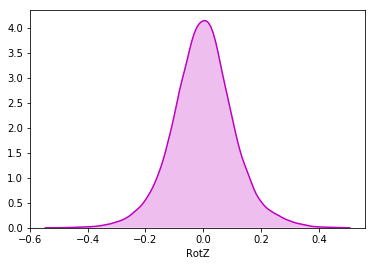

In [11]:
#%%
tnet.derive({'method':'jackknife', 'postpro': 'standardize'})

#%%

Now we can calculate the temporal degree centrality

In [12]:
tnet.networkmeasures('temporal_degree_centrality')


#%%

What we have now is data for all subjects and tasks. 

This can be plotted or quantified in different ways. 

In the next notebookm, something will be done with this data.